<a href="https://colab.research.google.com/github/dTony33/Machine-Learning/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.utils import np_utils
from keras import datasets, layers, models
from keras.optimizers import SGD, Adam, RMSprop

In [ ]:
(x_mnist_train,y_mnist_train),(x_mnist_test,y_mnist_test) = datasets.mnist.load_data()

In [ ]:
print(x_mnist_train.dtype)
print(x_mnist_train.shape)
print(y_mnist_train.shape)
print(y_mnist_train.dtype)

uint8
(60000, 28, 28)
(60000,)
uint8


In [ ]:
x_mnist_train = x_mnist_train.astype('float32')
x_mnist_test = x_mnist_test.astype('float32')
x_mnist_train /= 255
x_mnist_test /= 255


In [ ]:
x_mnist_train = x_mnist_train[:,:,:,np.newaxis]
x_mnist_test = x_mnist_test[:,:,:,np.newaxis]

In [ ]:
y_mnist_train = np_utils.to_categorical(y_mnist_train,10)
y_mnist_test = np_utils.to_categorical(y_mnist_test,10)

In [ ]:
y_mnist_test.shape

(10000, 10)

In [ ]:
cnn_increase = models.Sequential()


In [ ]:
from keras.layers.reshaping.flatten import Flatten
cnn_increase.add(layers.Conv2D(6, kernel_size=(5,5), padding = "same", input_shape = (28,28,1)))
cnn_increase.add(layers.Conv2D(7, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_increase.add(layers.Conv2D(8, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.Conv2D(9, kernel_size=(5,5), padding = "same"))

cnn_increase.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_increase.add(layers.Conv2D(10, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.Conv2D(11, kernel_size=(5,5), padding = "same"))

cnn_increase.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_increase.add(layers.Conv2D(12, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.Conv2D(13, kernel_size=(5,5), padding = "same"))

cnn_increase.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_increase.add(layers.Conv2D(14, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.Conv2D(15, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.Flatten())
cnn_increase.add(layers.Dense(10, activation= 'softmax'))
cnn_increase.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 7)         1057      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 7)        0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 8)         1408      
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 9)         1809      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 9)          0         
 g2D)                                                 

In [ ]:
# from keras.optimizers import SGD, Adam, RMSprop
# optimizers_list = [SGD(),Adam(),RMSprop()]

In [ ]:
# for k in optimizers_list:
#   print(k)

In [ ]:
evaluation = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = SGD(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score1 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'SGD',score1[1])
      evaluation.append((i,j,'SGD',score1))




Epoch 1/25
192/192 [==============================] - 33s 169ms/step - loss: 1.0147 - accuracy: 0.6710 - val_loss: 0.5994 - val_accuracy: 0.8013
Epoch 2/25
192/192 [==============================] - 35s 183ms/step - loss: 0.4683 - accuracy: 0.8531 - val_loss: 0.3168 - val_accuracy: 0.8994
Epoch 3/25
192/192 [==============================] - 35s 183ms/step - loss: 0.2667 - accuracy: 0.9166 - val_loss: 0.1999 - val_accuracy: 0.9384
Epoch 4/25
192/192 [==============================] - 36s 189ms/step - loss: 0.1915 - accuracy: 0.9397 - val_loss: 0.1531 - val_accuracy: 0.9543
Epoch 5/25
192/192 [==============================] - 38s 196ms/step - loss: 0.1542 - accuracy: 0.9516 - val_loss: 0.1587 - val_accuracy: 0.9513
Epoch 6/25
192/192 [==============================] - 39s 203ms/step - loss: 0.5166 - accuracy: 0.8648 - val_loss: 0.1759 - val_accuracy: 0.9502
Epoch 7/25
192/192 [==============================] - 38s 198ms/step - loss: 0.1455 - accuracy: 0.9555 - val_loss: 0.1335 - val_ac

In [ ]:
evaluation

[(0.01, 250, 'SGD', [0.05969966575503349, 0.9810000061988831]),
 (0.01, 500, 'SGD', [0.050209105014801025, 0.9861000180244446]),
 (0.01, 750, 'SGD', [0.048151686787605286, 0.9860000014305115]),
 (0.1, 250, 'SGD', [nan, 0.09799999743700027]),
 (0.1, 500, 'SGD', [nan, 0.09799999743700027]),
 (0.1, 750, 'SGD', [nan, 0.09799999743700027]),
 (0.25, 250, 'SGD', [nan, 0.09799999743700027]),
 (0.25, 500, 'SGD', [nan, 0.09799999743700027]),
 (0.25, 750, 'SGD', [nan, 0.09799999743700027]),
 (0.5, 250, 'SGD', [nan, 0.09799999743700027]),
 (0.5, 500, 'SGD', [nan, 0.09799999743700027]),
 (0.5, 750, 'SGD', [nan, 0.09799999743700027])]

In [ ]:
import pandas
df = pandas.DataFrame(evaluation)
df

,0,1,2,3
0,0.01,250,SGD,"[0.05969966575503349, 0.9810000061988831]"
1,0.01,500,SGD,"[0.050209105014801025, 0.9861000180244446]"
2,0.01,750,SGD,"[0.048151686787605286, 0.9860000014305115]"
3,0.10,250,SGD,"[nan, 0.09799999743700027]"
4,0.10,500,SGD,"[nan, 0.09799999743700027]"
5,0.10,750,SGD,"[nan, 0.09799999743700027]"
6,0.25,250,SGD,"[nan, 0.09799999743700027]"
7,0.25,500,SGD,"[nan, 0.09799999743700027]"
8,0.25,750,SGD,"[nan, 0.09799999743700027]"
9,0.50,250,SGD,"[nan, 0.09799999743700027]"


In [ ]:
cnn_decrease = models.Sequential()


In [ ]:
from keras.layers.reshaping.flatten import Flatten
cnn_decrease.add(layers.Conv2D(15, kernel_size=(5,5), padding = "same", input_shape = (28,28,1)))
cnn_decrease.add(layers.Conv2D(14, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_decrease.add(layers.Conv2D(13, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.Conv2D(12, kernel_size=(5,5), padding = "same"))

cnn_decrease.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_decrease.add(layers.Conv2D(11, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.Conv2D(10, kernel_size=(5,5), padding = "same"))

cnn_decrease.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_decrease.add(layers.Conv2D(9, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.Conv2D(8, kernel_size=(5,5), padding = "same"))

cnn_decrease.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_decrease.add(layers.Conv2D(7, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.Conv2D(6, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.Flatten())
cnn_decrease.add(layers.Dense(10, activation= 'softmax'))
cnn_decrease.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 28, 28, 15)        390       
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 14)        5264      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 14)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 14, 14, 13)        4563      
                                                                 
 conv2d_43 (Conv2D)          (None, 14, 14, 12)        3912      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 12)         0         
 g2D)                                                 

In [ ]:
decrease_evaluation = []
for i in [0.01,0.1,0.25,]:
  for j in [250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score4 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'Adam',score4[1])
      decrease_evaluation.append((i,j,'Adam',score4))




Epoch 1/25
192/192 [==============================] - 30s 151ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/25
192/192 [==============================] - 36s 188ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/25
192/192 [==============================] - 36s 188ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/25
192/192 [==============================] - 115s 601ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/25
192/192 [==============================] - 45s 236ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 6/25
192/192 [==============================] - 107s 557ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 7/25
192/192 [==============================] - 113s 587ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 8/25
192/192 [====

In [ ]:
decrease_df = pandas.DataFrame(decrease_evaluation)
decrease_df

,0,1,2,3
0,0.01,250,Adam,"[nan, 0.09799999743700027]"
1,0.01,500,Adam,"[nan, 0.09799999743700027]"
2,0.01,750,Adam,"[nan, 0.09799999743700027]"
3,0.10,250,Adam,"[nan, 0.09799999743700027]"
4,0.10,500,Adam,"[nan, 0.09799999743700027]"
5,0.10,750,Adam,"[nan, 0.09799999743700027]"
6,0.25,250,Adam,"[nan, 0.09799999743700027]"
7,0.25,500,Adam,"[nan, 0.09799999743700027]"
8,0.25,750,Adam,"[nan, 0.09799999743700027]"


In [ ]:
cnn_hourglass = models.Sequential()


In [ ]:
from keras.layers.reshaping.flatten import Flatten
cnn_hourglass.add(layers.Conv2D(6, kernel_size=(5,5), padding = "same", input_shape = (28,28,1)))
cnn_hourglass.add(layers.Conv2D(7, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_hourglass.add(layers.Conv2D(8, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.Conv2D(9, kernel_size=(5,5), padding = "same"))

cnn_hourglass.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_hourglass.add(layers.Conv2D(10, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.Conv2D(11, kernel_size=(5,5), padding = "same"))

cnn_hourglass.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_hourglass.add(layers.Conv2D(10, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.Conv2D(9, kernel_size=(5,5), padding = "same"))

cnn_hourglass.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_hourglass.add(layers.Conv2D(8, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.Conv2D(7, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.Flatten())
cnn_hourglass.add(layers.Dense(10, activation= 'softmax'))
cnn_hourglass.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 conv2d_51 (Conv2D)          (None, 28, 28, 7)         1057      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 7)        0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 14, 14, 8)         1408      
                                                                 
 conv2d_53 (Conv2D)          (None, 14, 14, 9)         1809      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 9)          0         
 g2D)                                                 

In [ ]:
hourglass_evaluation = []
for i in [0.01,0.1,0.25]:
  for j in [250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score7 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'RMS',score7[1])
      hourglass_evaluation.append((i,j,'RMS',score7))




Epoch 1/25
192/192 [==============================] - 36s 179ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/25
192/192 [==============================] - 37s 194ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/25
192/192 [==============================] - 40s 210ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/25
192/192 [==============================] - 39s 202ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/25
192/192 [==============================] - 36s 189ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 6/25
192/192 [==============================] - 38s 198ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 7/25
192/192 [==============================] - 38s 200ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 8/25
192/192 [=======

In [ ]:
hourglass_df = pandas.DataFrame(hourglass_evaluation)
hourglass_df

,0,1,2,3
0,0.01,250,RMS,"[nan, 0.09799999743700027]"
1,0.01,500,RMS,"[nan, 0.09799999743700027]"
2,0.01,750,RMS,"[nan, 0.09799999743700027]"
3,0.10,250,RMS,"[nan, 0.09799999743700027]"
4,0.10,500,RMS,"[nan, 0.09799999743700027]"
5,0.10,750,RMS,"[nan, 0.09799999743700027]"
6,0.25,250,RMS,"[nan, 0.09799999743700027]"
7,0.25,500,RMS,"[nan, 0.09799999743700027]"
8,0.25,750,RMS,"[nan, 0.09799999743700027]"


In [ ]:
import tensorflow as tf

from tensorflow import keras
from keras import datasets, layers, models

In [ ]:
# l = list(tf.keras.datasets.cifar10.load_data())

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


[8]


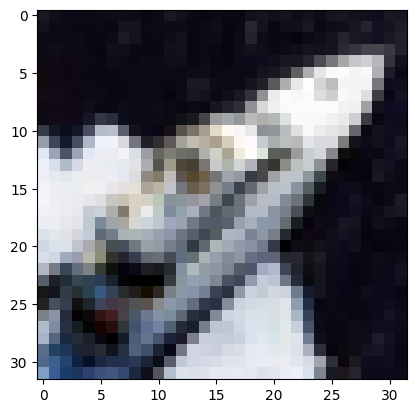

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[20000])
print(y_train[20000])

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
import numpy as np

x_train_gray = np.sum(x_train/3, axis=3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims = True)


In [ ]:
x_train_gray /= 255
x_test_gray /= 255

In [ ]:
x_train_gray

array([[[[0.24052288],
         [0.1751634 ],
         [0.18431373],
         ...,
         [0.52026144],
         [0.49542484],
         [0.49019608]],

        [[0.07320261],
         [0.        ],
         [0.03398693],
         ...,
         [0.34771242],
         [0.32941176],
         [0.34771242]],

        [[0.09150327],
         [0.03006536],
         [0.10980392],
         ...,
         [0.32941176],
         [0.33202614],
         [0.29281046]],

        ...,

        [[0.61960784],
         [0.50718954],
         [0.50326797],
         ...,
         [0.4745098 ],
         [0.12287582],
         [0.13986928]],

        [[0.54248366],
         [0.44183007],
         [0.47058824],
         ...,
         [0.55686275],
         [0.25228758],
         [0.22222222]],

        [[0.57124183],
         [0.51111111],
         [0.53333333],
         ...,
         [0.70588235],
         [0.46143791],
         [0.3751634 ]]],


       [[[0.67712418],
         [0.52156863],
         [0.39

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), activation = 'tanh', input_shape= (32,32,1)))

model.add(layers.MaxPooling2D(strides=2))

model.add(layers.Conv2D(16, (5,5), activation = 'tanh'))

model.add(layers.MaxPooling2D(strides=2))

model.add(layers.Conv2D(120,(5,5), activation='tanh'))

model.add(layers.Flatten())

model.add(layers.Dense(84, activation='tanh'))

model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_6 (Flatten)         (None, 120)              

In [ ]:
# 

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.96)

In [ ]:
scores = []
params = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [200,500,700,850]:
  # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  #   initial_learning_rate=1e-2,
  #   decay_steps=10000,
  #   decay_rate=0.96)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=i), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train_gray, y_train, epochs=25, batch_size=j, verbose=1)
    score = model.evaluate(x_test_gray,y_test)
    scores.append(score)
    params.append((i,j,scores,'Adam'))


Epoch 1/25
250/250 [==============================] - 13s 48ms/step - loss: 1.9652 - accuracy: 0.2860
Epoch 2/25
250/250 [==============================] - 12s 48ms/step - loss: 1.5159 - accuracy: 0.4595
Epoch 3/25
250/250 [==============================] - 13s 50ms/step - loss: 1.3664 - accuracy: 0.5187
Epoch 4/25
250/250 [==============================] - 13s 50ms/step - loss: 1.2895 - accuracy: 0.5482
Epoch 5/25
250/250 [==============================] - 12s 49ms/step - loss: 1.2120 - accuracy: 0.5742
Epoch 6/25
250/250 [==============================] - 11s 44ms/step - loss: 1.1957 - accuracy: 0.5811
Epoch 7/25
250/250 [==============================] - 11s 45ms/step - loss: 1.1604 - accuracy: 0.5939
Epoch 8/25
250/250 [==============================] - 11s 45ms/step - loss: 1.1392 - accuracy: 0.6024
Epoch 9/25
250/250 [==============================] - 12s 47ms/step - loss: 1.1388 - accuracy: 0.6024
Epoch 10/25
250/250 [==============================] - 12s 48ms/step - loss: 1.118

In [ ]:
for i in [0.01,0.1,0.25,0.5]:
  for j in [200,500,700,850]:
  # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  #   initial_learning_rate=1e-2,
  #   decay_steps=10000,
  #   decay_rate=0.96)
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=i), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train_gray, y_train, epochs=75, batch_size=j, verbose=1)
    score = model.evaluate(x_test_gray,y_test)
    scores.append(score)
    params.append((i,j,scores,'SGD'))

Epoch 1/75
250/250 [==============================] - 12s 48ms/step - loss: 3.9606 - accuracy: 0.0999
Epoch 2/75
250/250 [==============================] - 12s 46ms/step - loss: 2.3038 - accuracy: 0.0984
Epoch 3/75
250/250 [==============================] - 11s 45ms/step - loss: 2.3037 - accuracy: 0.0983
Epoch 4/75
250/250 [==============================] - 12s 46ms/step - loss: 2.3037 - accuracy: 0.0993
Epoch 5/75
250/250 [==============================] - 11s 45ms/step - loss: 2.3037 - accuracy: 0.1002
Epoch 6/75
250/250 [==============================] - 11s 45ms/step - loss: 2.3036 - accuracy: 0.1009
Epoch 7/75
250/250 [==============================] - 12s 46ms/step - loss: 2.3037 - accuracy: 0.0984
Epoch 8/75
250/250 [==============================] - 11s 44ms/step - loss: 2.3037 - accuracy: 0.0986
Epoch 9/75
250/250 [==============================] - 11s 45ms/step - loss: 2.3036 - accuracy: 0.0997
Epoch 10/75
250/250 [==============================] - 11s 45ms/step - loss: 2.303

In [ ]:
scores

[[1.3703720569610596, 0.5403000116348267],
 [1.4366624355316162, 0.5511000156402588],
 [1.6447285413742065, 0.5529000163078308],
 [1.9340101480484009, 0.5435000061988831],
 [2.4270150661468506, 0.10000000149011612],
 [2.3416428565979004, 0.10000000149011612],
 [2.4054806232452393, 0.10000000149011612],
 [2.313795804977417, 0.10000000149011612],
 [7.562735080718994, 0.10000000149011612],
 [2.335196018218994, 0.10000000149011612],
 [15.958453178405762, 0.10000000149011612],
 [5.297934055328369, 0.10000000149011612],
 [15.307839393615723, 0.10000000149011612],
 [20.11149024963379, 0.10000000149011612],
 [16.704113006591797, 0.10000000149011612],
 [11.867432594299316, 0.10000000149011612],
 [2.3041889667510986, 0.10000000149011612],
 [2.302712917327881, 0.10000000149011612],
 [2.302716016769409, 0.10000000149011612],
 [2.302767515182495, 0.10000000149011612],
 [2.3185558319091797, 0.10000000149011612],
 [2.3054375648498535, 0.10000000149011612],
 [2.3121559619903564, 0.10000000149011612],


In [ ]:
params

[(0.01,
  200,
  [[1.3703720569610596, 0.5403000116348267],
   [1.4366624355316162, 0.5511000156402588],
   [1.6447285413742065, 0.5529000163078308],
   [1.9340101480484009, 0.5435000061988831],
   [2.4270150661468506, 0.10000000149011612],
   [2.3416428565979004, 0.10000000149011612],
   [2.4054806232452393, 0.10000000149011612],
   [2.313795804977417, 0.10000000149011612],
   [7.562735080718994, 0.10000000149011612],
   [2.335196018218994, 0.10000000149011612],
   [15.958453178405762, 0.10000000149011612],
   [5.297934055328369, 0.10000000149011612],
   [15.307839393615723, 0.10000000149011612],
   [20.11149024963379, 0.10000000149011612],
   [16.704113006591797, 0.10000000149011612],
   [11.867432594299316, 0.10000000149011612],
   [2.3041889667510986, 0.10000000149011612],
   [2.302712917327881, 0.10000000149011612],
   [2.302716016769409, 0.10000000149011612],
   [2.302767515182495, 0.10000000149011612],
   [2.3185558319091797, 0.10000000149011612],
   [2.3054375648498535, 0.10000

In [ ]:
scores_df = pandas.DataFrame(scores)
params_df = pandas.DataFrame(params)
params_df

,0,1,2,3
0,0.01,200,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
1,0.01,500,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
2,0.01,700,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
3,0.01,850,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
4,0.10,200,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
5,0.10,500,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
6,0.10,700,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
7,0.10,850,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
8,0.25,200,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
9,0.25,500,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam


In [ ]:
feed_forward = models.Sequential()
feed_forward.add(layers.Conv2D(64, kernel_size=5, padding="same",input_shape=(32,32,1),activation="tanh"))
feed_forward.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
feed_forward.add(layers.Conv2D(64, kernel_size=5, padding="same",activation="tanh"))
feed_forward.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
feed_forward.add(layers.Conv2D(64, kernel_size=5, padding="same",activation = "tanh"))
        # Flatten => RELU layers
feed_forward.add(layers.Flatten())
feed_forward.add(layers.Dense(64,activation = "tanh"))
        # a softmax classifier
feed_forward.add(layers.Dense(10,activation = "softmax"))
feed_forward.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 8, 8, 64)          102464    
                                                                 
 flatten_7 (Flatten)         (None, 4096)             

In [ ]:
scores_ffd = []
params_ffd = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [200,500,700,850]:
  # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  #   initial_learning_rate=1e-2,
  #   decay_steps=10000,
  #   decay_rate=0.96)
    feed_forward.compile(optimizer=keras.optimizers.Adam(learning_rate=i), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    feed_forward.fit(x_train_gray, y_train, epochs=25, batch_size=j, verbose=1)
    score_ffd = model.evaluate(x_test_gray,y_test)
    scores_ffd.append(score_ffd)
    params_ffd.append((i,j,'Adam',scores_ffd))

Epoch 1/25
250/250 [==============================] - 85s 339ms/step - loss: 2.3330 - accuracy: 0.0995
Epoch 2/25
250/250 [==============================] - 102s 409ms/step - loss: 2.3289 - accuracy: 0.0989
Epoch 3/25
250/250 [==============================] - 103s 412ms/step - loss: 2.3287 - accuracy: 0.0976
Epoch 4/25
250/250 [==============================] - 101s 403ms/step - loss: 2.3253 - accuracy: 0.0995
Epoch 5/25
250/250 [==============================] - 102s 407ms/step - loss: 2.3287 - accuracy: 0.0986
Epoch 6/25
250/250 [==============================] - 101s 405ms/step - loss: 2.3310 - accuracy: 0.1027
Epoch 7/25
250/250 [==============================] - 101s 403ms/step - loss: 2.3251 - accuracy: 0.0997
Epoch 8/25
250/250 [==============================] - 101s 403ms/step - loss: 2.3295 - accuracy: 0.0991
Epoch 9/25
250/250 [==============================] - 102s 408ms/step - loss: 2.3244 - accuracy: 0.1001
Epoch 10/25
250/250 [==============================] - 101s 403ms

In [ ]:
ffd_df = pandas.DataFrame(params_ffd)
ffd_df

,0,1,2,3
0,0.01,200,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
1,0.01,500,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
2,0.01,700,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
3,0.01,850,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
4,0.10,200,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
5,0.10,500,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
6,0.10,700,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
7,0.10,850,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
8,0.25,200,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
9,0.25,500,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."


In [ ]:
X = np.array([[[7], [5], [0], [0], [3], [2]],
                   [[6], [4], [5], [1], [4], [8]],
                   [[9], [0], [2], [2], [5], [4]],
                   [[6], [3], [4], [7], [9], [8]],
                   [[5], [7], [5], [6], [9], [0]],
                   [[7], [9], [0], [8], [2], [3]]])

f = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])

In [ ]:
X.shape[0]

6

Dimensions of X is 6

In [ ]:
f.shape[0]

3

Dimensions of filter is 3

In [ ]:
f.shape[0] * f.shape[1]

9

Parameters of kernel is 9

Formula to Convolution layer C = ((n-f+2p)/s)+1 

n = size of input matrix

f = size of the filter

p is the Padding

s = Stride

SO, n= 6,f =3,p=0,s =1

C=((6-3+2x0)/1)+1=4

Output Convolutional matrix will be of size  4 X 4.

Calculating Matrix 

=>7*1+5*0+0*-1+6*2+4*0+5*-2+9*1+0*0+(-1)*2 =>7+0+0+12+0-10+9=28-10=18

=> 5*1+0+0+4*2+0+1*-2+0+0+2*-1 =>9

=> 0+0+-3+5*2+0+4*-2+2*1+0+5*-1 => -4

=> 0+0+2*-1+1*2+0+8*-2+2*1+0+4*-1 => -18

Similarly 
2nd row => 17,-3,10,-12
3rd row => 11,-9,-17,2
4rth row => 9, -1, -15, 16

Entire Convolutional Matrix is


18	9	-4	-18
17	-3	-10	-12
11	-9	-17	2
9	-1	-15	16



Max pooling 

This selects the max values of all the matrix in each filter which is 3 X 3 with stride 1 from the convolutional matrix above

max(18,9,-4,17,-3,-10,11,-9,-17)=18
max(9,-4,-18,-3,-10,-12,-9,-17,2) = 9
max(17,-3,-10,11,-9,-17,9,-1,-15) = 17
max(9-3,-10,-12,-9,-17,2,-1,-15,16) = 16

Hence the final Max pooling matrix is 
18	9
17	16

**Question 1**


I have created dataframes of all the learning rates and batch sizes for every cnn netwrok

Evaluaition of CNN network with increasing filter


In [ ]:
df

,0,1,2,3
0,0.01,250,SGD,"[0.05969966575503349, 0.9810000061988831]"
1,0.01,500,SGD,"[0.050209105014801025, 0.9861000180244446]"
2,0.01,750,SGD,"[0.048151686787605286, 0.9860000014305115]"
3,0.10,250,SGD,"[nan, 0.09799999743700027]"
4,0.10,500,SGD,"[nan, 0.09799999743700027]"
5,0.10,750,SGD,"[nan, 0.09799999743700027]"
6,0.25,250,SGD,"[nan, 0.09799999743700027]"
7,0.25,500,SGD,"[nan, 0.09799999743700027]"
8,0.25,750,SGD,"[nan, 0.09799999743700027]"
9,0.50,250,SGD,"[nan, 0.09799999743700027]"


It is evident that with learning rate 0.01 and batch size 250 and SGD opimizers, the network perfomed well with loss of 0.596 and accuracy of 0.981.
It is also evident that the batch size didnt effect the model untill or unless learning rate has been changed. Performance of the model is diminished as learnig rate is increased from 0.01 to 0.1,0.25,0.5


Evaluation of CNN Network with Decreasing filters

In [ ]:
decrease_df

,0,1,2,3
0,0.01,250,Adam,"[nan, 0.09799999743700027]"
1,0.01,500,Adam,"[nan, 0.09799999743700027]"
2,0.01,750,Adam,"[nan, 0.09799999743700027]"
3,0.10,250,Adam,"[nan, 0.09799999743700027]"
4,0.10,500,Adam,"[nan, 0.09799999743700027]"
5,0.10,750,Adam,"[nan, 0.09799999743700027]"
6,0.25,250,Adam,"[nan, 0.09799999743700027]"
7,0.25,500,Adam,"[nan, 0.09799999743700027]"
8,0.25,750,Adam,"[nan, 0.09799999743700027]"


Having been used Adam as an optimizer, this decreasing filters model doesnt perform very well whose accuray is always same with different learning rates and different batch sizes.
Its accuracy is 0.097 which is same all along

Evaluation of Hour Glass model

In [ ]:
hourglass_df

,0,1,2,3
0,0.01,250,RMS,"[nan, 0.09799999743700027]"
1,0.01,500,RMS,"[nan, 0.09799999743700027]"
2,0.01,750,RMS,"[nan, 0.09799999743700027]"
3,0.10,250,RMS,"[nan, 0.09799999743700027]"
4,0.10,500,RMS,"[nan, 0.09799999743700027]"
5,0.10,750,RMS,"[nan, 0.09799999743700027]"
6,0.25,250,RMS,"[nan, 0.09799999743700027]"
7,0.25,500,RMS,"[nan, 0.09799999743700027]"
8,0.25,750,RMS,"[nan, 0.09799999743700027]"


Hourglass model with RMSprop as an optimizer performed very low as same as Adam optimizer in the decreasing filter model. Batch size and filter size seemed no effect on the the network

**Question 2** 


For Question 2 I have created a model with 4 learning rates

[0.01,0.1,0.25,0.5]

and also with 4 different bacth sizes of [250,500,750,800]
with both Adam and SGD as optimizers

I have chosen 'Tanh' Activation function for the convolutional layers and 'softmax' at the output layer

In [ ]:
params_df

,0,1,2,3
0,0.01,200,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
1,0.01,500,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
2,0.01,700,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
3,0.01,850,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
4,0.10,200,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
5,0.10,500,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
6,0.10,700,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
7,0.10,850,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
8,0.25,200,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam
9,0.25,500,"[[1.3703720569610596, 0.5403000116348267], [1....",Adam


For the question to take Adam as an optimizer and with epoch size of 25, the performance decreased as the learning rate and batch size is increaed. The best accuracy of the model is 0.54 for the leanring rate 0.01 with different batch sizes

For the hyperparameter tuning I have chooses epoch size as 75 and with same learning rates and batch sizes, but the optimizer is SGD.
Both the performance of Adam and SGD are almost same with all the learning rate and batch sizes. Accuracy remained same all the way through the evalution with these parameters which is 0.54

Feed forward Neural Network

In [ ]:
ffd_df

,0,1,2,3
0,0.01,200,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
1,0.01,500,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
2,0.01,700,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
3,0.01,850,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
4,0.10,200,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
5,0.10,500,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
6,0.10,700,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
7,0.10,850,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
8,0.25,200,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."
9,0.25,500,Adam,"[[8.264127731323242, 0.10000000149011612], [8...."


For the Feed Forward Neural Network of same filters through out the model, I have chosen 'Tanh' for the convo2d layers and 'softmax' at the output layer with the same learning rate [0.01,0.1,0.25,0.50] and batch sizes of [200,500,700,800] and optimizer 'Adam'. The performance of this model, is not the best when compared to the LeNEt model. This models accuracy is just 0.1